<a href="https://colab.research.google.com/github/MisterRus01/AbstractFactoryDZ/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Thresholding i prostori boja

Ove laboratorijske vježbe se rješavaju u Google Colabu i spremaju na GitHub repozitorij koji je povezan na GitHub Classroom.

## Alati koje koristite za predavanje zadataka

U ovom dokumentu ćete rješavati zadatke. Ovo je **Jupyter Notebook** i ima ekstenziju **.ipynb**, interaktivno web okruženje za analizu podataka, vizualizaciju, prikaze rješenja, edukaciju i sl.

**Google Colab** je alat pomoću kojega možete pokretati i dijeliti Jupyter Notebook datoteke na Googleovim serverima, uključujući i korištenje Googleovih CPU, GPU i TPU resursa. Colab je kao Google Docs za Jupyter Notebook. **Google Colab ne sprema vašu zadaću na GitHub automatski.**

**GitHub koristite za spremanje i predavanje vaše zadaće.** Kad prihvatite zadatak preko GitHub classroom, automatski vam se kreira repozitorij na vašem GitHub računu s kopijom zadatka. Tamo ćete spremiti vaša rješenja. Spremanjem rješenja predajete zadatke tog labosa.

## Kako riješiti zadatke?

1. Prihvatite zadatak putem Google Classroom linka koji ćete dobiti. Google Classroom će kreirati repozitorij na vašem računu.
2. Uđite u novokreiran repozitorij na vašem računu u kliknite na **.ipynb** datoteku, zatim kliknite **Open in Colab**.
3. Zadatke rješavate u Google Colabu.

## Kako spremiti (predati) zadatke?

1. Unutar **Google Colaba** kliknite na **Open settings** kotačić u gornjem desnom kutu.
2. Kliknite na **GitHub** tab i odaberite kvačicu za **Access private repositories and organizations**.
3. Otvorit će se novi prozor da dodate pristup GitHubu. Kod **ferit-osirv** kliknite **Grant**.  
4. Spremite i izađite iz postavki.


5. Kliknite na **File > Save a copy in GitHub**.
6. Odaberite kreiran repozitorij labosa **koji uključuje vaše ime**.

> *Napomena:* Korake 1-4 morate napraviti samo prvi put.

## Kopiranje datoteka iz GitHub repozitorija

Za izradu vježbi bit će vam potrebne slike i druge datoteke koje će se nalaziti u GitHub repozitoriju vježbe. Ovakva komanda će biti dostupna u notebooku svake vježbe. Ona će kopirati datoteke s GitHuba u Google Colab okruženje.

**Ovu komandu je potrebno pokrenuti prije nego što krenete raditi svaku vježbu.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab2 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 33 (delta 2), reused 15 (delta 2), pack-reused 14 (from 1)
Receiving objects: 100% (33/33), 6.06 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Google Colab će povremeno obrisati sve datoteke.** Tako da će možda biti potrebno ponovno pokrenuti ovu komandu između dvije sesije. Ako dobivate greške da datoteke ne postoje, probajte ponovno pokrenuti gornju komandu.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Color spaces

In this lab, you'll get familiar with image color spaces. On the web and in general usage, most images are encoded as **RGB**: **R**ed, **G**reen, and **B**lue. OpenCV generally uses **BGR**: Blue, Green, Red.

This is just one of the many ways we can represent an image. In an RGB image, we get a pixel by mixing the three colors. We can get the same pixel by using different numbers and formulae to combine them. For instance, the **CMYK** color space encodes each pixel in 4 primary colors: **C**yan, **M**agenta, **Y**ellow and **K**ey (Black). Since printers use these primary colors, CMYK is often used when preparing images for print.

Not all color spaces consist only of primary colors. For instance, **HSV** (**H**ue, **S**aturation, **V**alue) stores the color in Hue, the color's intensity in Saturation, and the general brightness of that pixel in Value. The Hue portion is a number in [0, 179] (in OpenCV, usually it's an arc around a circle, so [0, 360)) where 0 is red, and the hue slowly shifts to green and then blue as you get to higher numbers.

![](hsv_1.png)

You can think of the whole HSV color space as a cylinder. The height on the cylinder corresponds to how dark the pixel is, the distance from the center tells you how non-gray it is, and the angle tells you which color the pixel is.

![](hsv_2.png)

*(source: https://en.wikipedia.org/wiki/HSL_and_HSV#/media/File:HSV_color_solid_cylinder_saturation_gray.png)*

There are many color spaces each with its uses. One other color space we'll mention in **YCbCr**. Y is the **luma** component, similar to the Value in HSV. Cb is the **blue-difference chroma component**, i.e. how blue should this pixel be tinted. Similarly, Cr is the **red-difference chroma component**, which tells you how much should a pixel be tinted red. Even with a different type of representation, each YCbCr is capable of showing all RGB images.

![](ycbcr.png)

*(source: https://en.wikipedia.org/wiki/YCbCr#/media/File:CCD.png)*

The reason YCbCr is important is because of the human eye. Our eyes are much more sensitive to luminance than actual color differences. Therefore, when compressing images, it's better to compress the chroma components than luminance if you want the image to look the same to a human observer.  This is called **chroma subsampling** and is used heavily in image and video compression, including MPEG, JPEG, DVD and Blu-Rays, and many others.

## In OpenCV

OpenCV supports a plethora of color spaces for images. The main function to convert color spaces is: [img = cv.cvtColor(img, code)](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). The `code` tells OpenCV **from** which format to convert the image, as well as **to** which format. You can see all the color conversion codes [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0). For example:

- cv.COLOR_BGR2YCrCb (BGR to YCbCr)
- cv.COLOR_YCrCb2BGR (back to BGR as the name suggests)
- cv.COLOR_RGB2HSV
- etc.

Note: You'll have to convert the image back to RGB if you want to use matplotlib to display it in its original form.


## Zadatak 1

Ucitajte sliku `images/peppers.png` pomocu OpenCV-a i pretvorite je u HSV prostor koristeći gore navedenu funkciju. Zatim slici u HSV prostoru dodajte H (hue) kanalu 30 za svaki piksel. Tu sliku pretvorite u RGB i prikazite.

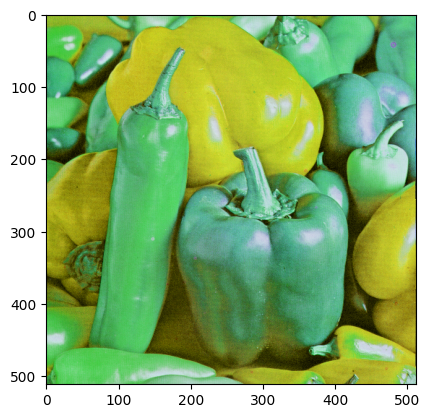

In [5]:
img = cv.imread('images/peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img[:, :, 0] += 30
img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
plt.imshow(img)
plt.show()

## Zadatak 2

Ucitajte sliku `images/peppers.png` pomocu OpenCV-a i pretvorite je u HSV prostor koristeći gore navedenu funkciju. Zatim slici u HSV postavite H (hue) kanalu na 0 za svaki piksel. Tu sliku pretvorite u RGB i prikazite.

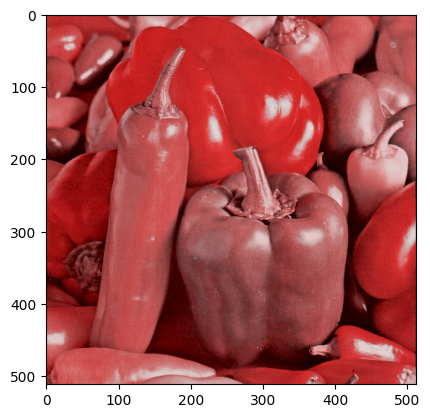

In [7]:
img2 = cv.imread('images/peppers.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
img2[:, :, 0] = 0
img2 = cv.cvtColor(img2, cv.COLOR_HSV2RGB)
plt.imshow(img2)
plt.show()

# Thresholding

## What is Thresholding?

The simplest segmentation method

Application example: Separate out regions of an image corresponding to
objects which we want to analyze. This separation is based on the variation
of intensity between the object pixels and the background pixels.

To differentiate the pixels we are interested in from the rest (which will
eventually be rejected), we perform a comparison of each pixel intensity
value with respect to a threshold (determined according to the problem to
solve).

Once we have separated properly the important pixels, we can set them with
a determined value to identify them (i.e. we can assign them a value of 0
(black), 255 (white) or any value that suits your needs).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Example.jpg)


## Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a
threshold value, it is assigned one value (may be white), else it is assigned
another value (may be black). The function used is `cv2.threshold`. First
argument is the source image, which should be a grayscale image. Second
argument is the threshold value which is used to classify the pixel values.
Third argument is the ` maxVal ` which represents the value to be given if pixel
value is more than (sometimes less than) the threshold value. OpenCV provides
different styles of thresholding and it is decided by the fourth parameter of
the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

To illustrate how these thresholding processes work, let’s consider that we
have a source image with pixels with intensity values $` src(x,y) `$.
The plot below
depicts this. The horizontal blue line represents the threshold $` thresh `$ (fixed).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Base_Figure.png)

The documentation clearly explains what each type is meant for. [Please check out the
documentation](http://docs.opencv.org/doc/tutorials/imgproc/threshold/threshold.html).

## Zadatak 3

Koristeci OpenCV ucitajte sliku `images/apple.jpg` kao **grayscale** sliku. Na njoj napravite jednostavan **binary** thresholding na 2 nacina: 1) putem gore navedene OpenCV funkcije i 2) putem numpyja postavljanjem svih piksela iznad neke vrijendosti na 255, a ostale na 0. Prikazite thresholdanu sliku.

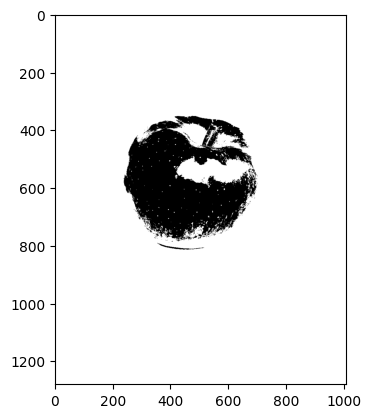

In [12]:
img3 = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
ret, thresh = cv.threshold(img3, 89, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()

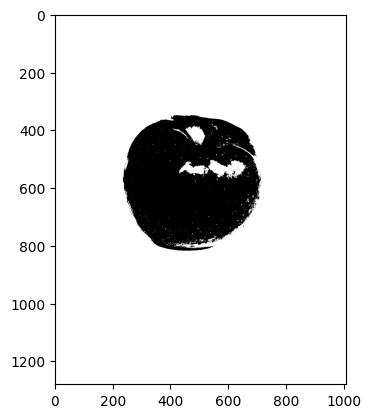

In [18]:
img4 = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
thresh_numpy = np.where(img4 > 127, 255, 0).astype(np.uint8)
plt.imshow(thresh_numpy, cmap='gray')
plt.show()

### Otsu binarizacija

**Binarizacija** slike je pretvaranje slike u format gdje svaki piksel moze biti samo jedna od dvije moguce vrijednosti. Kod `uint8` slika te vrijednosti su pretezno `0`(crna) i 255 (bijela). Kod `float` slika te vrijednosti su `0` (crna) ili `1.0` (bijela). **Binarijzacija** je cesto preteca **thresholdingu**, gdje sliku podijelimo na potpuno bijele i crne regije, a zatim iz originalne slike zadrzimo samo onaj dio koji je kod binarne slike potpuno bijel. Matematicki, mnozenjem originalne i binarne slike, oni pikseli koji su u binarnoj slici potpuno bijeli ostaju nepromjenjeni, ali oni koji su potpuno crni se mnoze s 0 tako da ce biti potpuno crni i na slici umnoska.

U proslom primjeru ste rucno odredili threshold. Otsu binarizacija je naprednija metoda koja na osnovi **histograma** slike odredi optimalan prag koji najbolje razdvaja piksele. Histogram je graf koji za svaku vrijednost prikazuje broj pojavljivanja te vrijednosti u nekom skupu podataka. U slučaju slike, histogram za svaku vrijednost boje pokazuje koliko piksela je te boje.

Pogledajmo histogram slike `apple.jpg`.

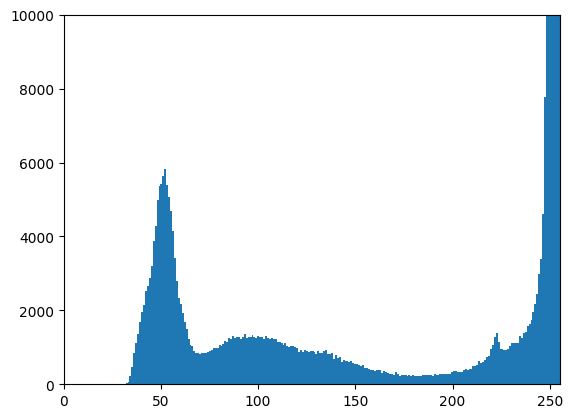

In [19]:
img = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(), bins=256, range=(0, 255))
plt.ylim([0, 10000])
plt.xlim([0, 255])
plt.show()

Iz histograma je vidljivo da je vecina piksela grupirano oko vrijednosti 255 i 50. Odokativno vidimo da bi optimalan nacin razdvajanja piksela u dvije grupe bio s pragom izmedju 150 i 200, taj prag dobro odvaja dvije najvece skupine piksela.

## Zadatak 4

Prema sljedećem linku implementirajte Otsu binarizaciju slike `apple.jpg`. Prikazite rezultirajucu binarnu sliku **pomocu matplotliba**. Na konzolu isprintajte optimalan prag prema Otsu metodi.

In [20]:
img5 = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
ret, thresh = cv.threshold(img5, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret)

165.0


Takvu binarnu sliku mozemo korisiti kao **masku** za originalnu sliku. Maska je binarna slika koja ima vrijednost `0` za sve piksele koji ne trebaju biti vidljivi, a maksimulnu vrijednost (1.0 ili 255) za piksele koji trebaju biti vidljivi.

## Zadatak 5

Koristeći Otsu binarnu sliku kao masku, primjenite funkciju `img_thresholded = cv.bitwise_and(img, img, mask=mask)` gdje je `img` originalna grayscale slika jabuke, a `mask` Otsu binarna slika.

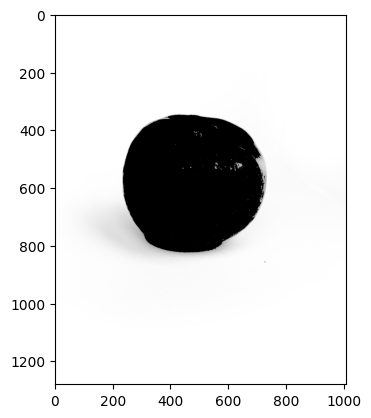

In [21]:
img_thresholded = cv.bitwise_and(img5, img5, mask=thresh)
plt.imshow(img_thresholded, cmap='gray')
plt.show()